In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import  train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('gdm-daa.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_array = data.values
y = data_array[:,0]
X = data_array[:,1:]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.8, random_state=241)

In [5]:
#def convert_predict(y):
#    return [1 / (1 + np.power(np.e,(-1*i))) for i in y]

In [6]:
#l_log_train, l_log_test = [],[]
#for lrate in [1, 0.5, 0.3, 0.2, 0.1]:
#    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=lrate)
#    clf.fit(X_train, y_train)
#    y_test_pred = clf.staged_decision_function(X_test)
#    y_train_pred = clf.staged_decision_function(X_train)
#    log_train = log_loss(y_train, convert_predict(y_train_pred))
#    log_test = log_loss(y_test, convert_predict(y_test_pred))
#    l_log_train.append(log_train)
#    l_log_test.append(log_test)

0.5314507963190638
36


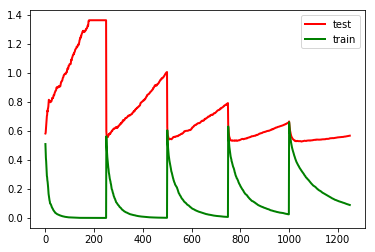

In [7]:
log_loss_train = []
log_loss_test = []
rate02log = []
for rate in [1, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=False, learning_rate=rate, random_state=241)
    clf.fit(X_train, y_train)
    for y_pred_train in clf.staged_decision_function(X_train):
        log_loss_train.append(log_loss(y_train, 1 / (1 + np.exp(-y_pred_train))))
    for y_pred_test in clf.staged_decision_function(X_test):
            log_loss_test.append(log_loss(y_test, 1 / (1 + np.exp(-y_pred_test))))
            if rate == 0.2:
                rate02log.append(log_loss(y_test, 1 / (1 + np.exp(-y_pred_test))))
                
            
m = min(rate02log)
print(m)
print(rate02log.index(m))
#min_value = 10000
#min_index = 0
#for index, value in enumerate(log_loss_test):
#    if value < min_value:
#        min_value = value
#        min_index = index
#print(min_index)
#print(min_value)
plt.figure()
plt.plot(log_loss_test, 'r', linewidth=2)
plt.plot(log_loss_train, 'g', linewidth=2)
plt.legend(['test', 'train'])
plt.show()